# Example 2
This notebook's cells will run a small-scale simulation of methdemon for a cancer without spatial organisation. The methylation arrays shown in the plots are sampled at different timepoints in the cancer's evolution. This simulation will generate an output file (`demes.dat`) which can be quite large depending on the chosen parameters. For example, try tweaking the methylation rate parameters or population size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define relative paths to output files
outputs_path = 'outputs/'
demes_file = 'demes.dat'

In [3]:
# Uncomment the below three lines and run if methdemon has not been compiled yet
# NOTE: Change the path to the include directory of your boost installation

#!cd ../../src
#!g++ -o methdemon methdemon.cpp -I/usr/local/include/ -lm  
#!cd ../examples/eg1

In [4]:
%%capture
# Run the example simulation
!../../src/methdemon ./outputs configfile-eg2.dat

In [5]:
# Read in the output files
demes = pd.read_csv(outputs_path + demes_file, sep='\t')
demes.head()

,Generation,X,Y,Population,NormalCells,DeathRate,Diversity,DriverDiversity,AvgMethArray
0,0.000000,0,0,1,131071,0.0,0.0,0.0,0.00 1.00 1.00 0.50 1.00 1.00 0.50 0.00 0.50 0...
1,10.000140,0,0,36,131037,100.0,0.0,0.0,0.00 0.96 1.00 0.50 1.00 1.00 0.50 0.24 0.50 0...
2,20.000227,0,0,101,130972,100.0,0.0,0.0,0.00 0.92 0.96 0.51 1.00 0.99 0.62 0.02 0.50 0...
3,30.000267,0,0,286,130787,100.0,0.0,0.0,0.02 0.90 0.99 0.53 1.00 0.98 0.62 0.02 0.50 0...
4,40.000362,0,0,617,130456,100.0,0.0,0.0,0.05 0.90 1.00 0.55 0.99 1.00 0.56 0.07 0.50 0...


In [6]:
# Define 5 generations at which to plot the methylation array of the cancer
first_gen = demes['Generation'].min()
last_gen = demes['Generation'].max() # t = T

In [7]:
# Obtain the methylation arrays of the cancer at the start and end times 
first_gen_meth = demes[demes['Generation'] == first_gen]['AvgMethArray'].apply(lambda x: [float(i) for i in x.split()])
last_gen_meth = demes[demes['Generation'] == last_gen]['AvgMethArray'].apply(lambda x: [float(i) for i in x.split()])

# Half-way generation's index
half_gen = demes[demes['Generation'] == demes['Generation'][int(len(demes.Generation)/2)]]['AvgMethArray'].apply(lambda x: [float(i) for i in x.split()])

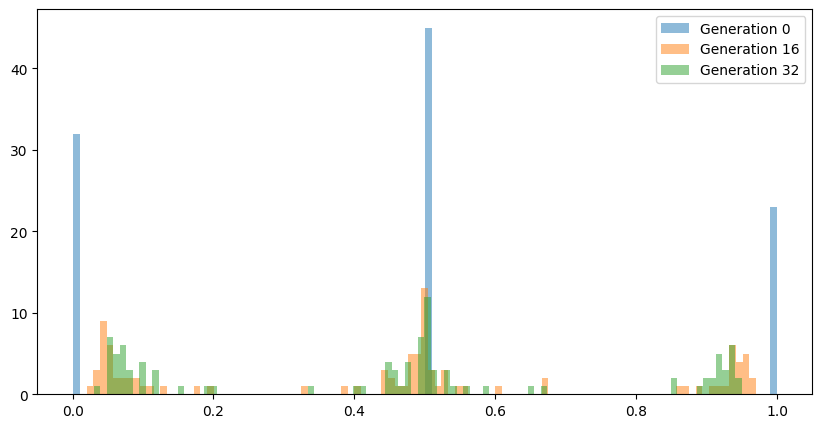

In [8]:
# Plot methylation array histograms on a single figure
plt.figure(figsize=(10, 5))
plt.hist(first_gen_meth, bins=100, alpha=0.5, label='Generation 0')
plt.hist(half_gen, bins=100, alpha=0.5, label='Generation 16')
plt.hist(last_gen_meth, bins=100, alpha=0.5, label='Generation 32')
plt.legend(loc='upper right')